## 5. Exercise sheet

In [1]:
import numpy as np 
from scipy.optimize import minimize  # for Ex. 1
import matplotlib.pyplot as plt  # for Ex. 1

from numpy.random import choice  # for Ex. 2

import math # for Ex. 3

### Exercise 1 - Compute MAP estimate and compare Steepest descent to Newton

We have 

\begin{align}
    L(x)   &= \frac{1}{2}\Big( -\frac{7}{12}x^3 + \frac{7}{2}x^2 - 8x + 2 \Big)^2 +(x+2)^2 \\ 
    L'(x)  &= \Big( -\frac{7}{12}x^3 + \frac{7}{2}x^2 - 8x + 2  \Big)\Big( -\frac{7}{4}x^2 + 7x - 8 \Big) + 2(x+2) \\ 
    L''(x) &= \Big( -\frac{7}{4}x^2 + 7x - 8 \Big)^2 + \Big(-\frac{7}{12}x^3 + \frac{7}{2}x^2 - 8x + 2 \Big)\Big(-\frac{7}{2}x + 7\Big) + 2x 
\end{align}

In [2]:
def L(x): 
    """Calculates L(x)   : Cost functional """
    return 1/2*(-7/13*x**3 + 7/2*x**2 - 8*x + 2)**2 + (x+2)**2

def L1(x): 
    """Calculates L'(x)  : 1. derivative of L(x)"""
    return (-7/12*x**3 + 7/2*x**2 - 8*x + 2)*(-7/4*x**2 + 7*x - 8) + 2*(x+2)

def L2(x):
    """Calculates L''(x) : 2. derivative of L(x)"""
    return (-7/4*x**2 + 7*x - 8)**2 + (-7/12*x**3 + 7/2*x**2 - 8*x + 2)*(-7/2*x + 7) + 2*x

def steepest_descent_method(xOld, L1_xOld): 
    """calcuates the updated value of xOld via the steepest descent method."""
    return xOld - L1_xOld

def steepest_descent_method_with_stepsize(xOld, L1_xOld, step_size): 
    """calculates the updated value of xOld via the steepest descent method including a step-size."""
    return xOld - step_size*L1_xOld

def newtons_method(xOld, L1_xOld, L2_xOld): 
    """calculates the updated value of xOld via the Newton method."""
    return xOld - L1_xOld/L2_xOld 

#### MAP computation

In [3]:
x_hat = minimize(L, 0)
x_hat

      fun: 4.976669108429765
 hess_inv: array([[0.01924549]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.18369073])

#### Plotting of $L(x)$ and $L'(x)$

In [4]:
def plot_L(L, x, which_function): 
    plt.plot(x, L(x), c="#2E8B57"); 
    plt.scatter(x_hat.x,0, s=50, c="black", marker="x");
    plt.legend([which_function, "argmin L(x)"]);
    plt.xlabel("x");
    plt.ylabel(which_function);
    plt.title(which_function + " and $\hat{x}*$ for which $L'(\hat{x}*)=0$ and $L(x)$ is minimal.");

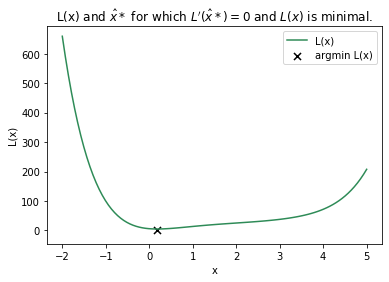

In [5]:
x = np.linspace(-2,5,100)
plot_L(L, x, "L(x)")

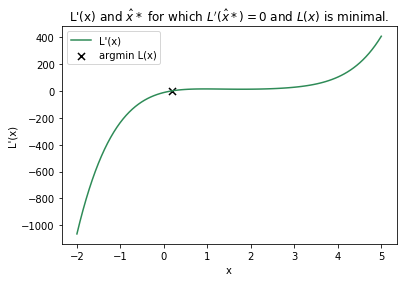

In [6]:
plot_L(L1, x, "L'(x)")

#### Comparison of Steepest descent and Newton method

In [250]:
iters     = 100
step_size = 0.002
x0        = -2
x_steepest_old, x_steepest_with_step_old, x_newton_old = x0, x0, x0

for i in range(iters): 
    x_steepest           = steepest_descent_method(x_steepest_old, 
                                                   L1(x_steepest_old))
    x_steepest_with_step = steepest_descent_method_with_stepsize(x_steepest_with_step_old, 
                                                                 L1(x_steepest_with_step_old), 
                                                                 step_size)
    x_newton             = newtons_method(x_newton_old, 
                                          L1(x_newton_old), 
                                          L2(x_newton_old))

    x_steepest_old           = x_steepest
    x_steepest_with_step_old = x_steepest_with_step
    x_newton_old             = x_newton
    
print(f"Steepest without stepsize       : {x_steepest}")
print(f"Steepest with    stepsize {step_size} : {x_steepest_with_step}")
print(f"Newton method                   : {x_newton}")

Steepest without stepsize       : nan
Steepest with    stepsize 0.002 : 0.18370987403494196
Newton method                   : 0.18371088079152964


<font color="Blue">**Discussion**</font>: Even after $10$ iterations the *Newton method* is very close the optimal minima of $L(x)$ which is around $0.1837$. Since the *Steepest descent method* does not have any shrinking part in it it quickly goes to very large numbers. This can also be verified when investigating the second plot. Since we start at $-2$ we value of $L'(x)$ is already more than $1000$ and will become smaller for every iteration. If we would include a step-size of e.g. $0.002$ as shown above, the steepest descent method would also converge against the minima. This is because we are not not oscillating away from the minima but not in the direction of the minima because of the shrinking term *step_size*.

**COMMENT:** Newtons method converges much faster here. But it also uses the inverse of the second derivative. In high dimensions that means it has to compute the hessian (very expensive) and invert it (also very expensive), while gradient descent only need to compute the gradient, which can also already be to expensive in some models but is much cheaper than calculating and inverting the hessian.